In [328]:
'''
C11
Throw two dice 10 times and record the sum of the numbers obtained.
Draw the frequency curve of sum vs frequency.
Record the number of times you obtain the sum as greater than 5.
Next perform 10 trials of throwing two dice for 10 times.
Step 1: Find the number of times you obtain the sum
as greater than 5, in each trial- that is, Count
Step 2: Draw the graph of Count vs frequency
for all the trials put together.
Next perform 20 trials of throwing two dice for 10 times.
Repeat Steps 1 and 2.
Increase the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·
Repeat Steps 1 and 2 in each case.
What do you observe ?- Can you identify the distribution?
'''
# For a normal distribution
# 1) The curve must have a bell shape
# 2) The Mean and Median are equal
# 3) 68% of the data falls within 1 standard deviation

# Central Limit Theorem
# States that samples mean tend towards Normal Distribution even if the Original Variables are not distributed
# For e.g Weighted Dice
# Assumptions
# 1) All variables are independent for each other. True in our case.
# 2) Each variable is drawn from the same distribution. True in our case.
# Above 2 assumptions are called IID - Independently and Identically Distributed
# 3) The Variance must be finite.

# The Galton Board violates the first 2 assumptions but still produces a reasonable normal distribution
# Hence, they can be relaxed (Lindeberg's Condition/Lindeberg's CLT and Alpha Mixing)

'\nC11\nThrow two dice 10 times and record the sum of the numbers obtained.\nDraw the frequency curve of sum vs frequency.\nRecord the number of times you obtain the sum as greater than 5.\nNext perform 10 trials of throwing two dice for 10 times.\nStep 1: Find the number of times you obtain the sum\nas greater than 5, in each trial- that is, Count\nStep 2: Draw the graph of Count vs frequency\nfor all the trials put together.\nNext perform 20 trials of throwing two dice for 10 times.\nRepeat Steps 1 and 2.\nIncrease the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·\nRepeat Steps 1 and 2 in each case.\nWhat do you observe ?- Can you identify the distribution?\n'

In [329]:
from scipy.stats import kurtosistest # For Testing Normality
import random # For RNG
import numpy as np # For Calculations
import seaborn as sns # For Graphs
import scipy.stats as stats # For Calculations
import matplotlib.pyplot as plt # For Graphs

In [330]:
probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] # Define Probability of each side
times = 10 # Define the number of times to roll the dice
num_dice = 2 # Define the number of dice to be rolled

In [331]:
plt.style.use("ggplot") # Use the 'ggplot' style

In [332]:
def percent_data_in_1_stdev(data):
    # calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # calculate the lower and upper bounds for 1 standard deviation
    lower_bound = mean - std_dev
    upper_bound = mean + std_dev

    # calculate the percentage of data that falls within 1 standard deviation
    within_1std = np.logical_and(data > lower_bound, data < upper_bound)
    percent_within_1std = np.sum(within_1std) / len(data) * 100

    return percent_within_1std    

In [333]:
def plot_frequency_curve(data, xlabel, ylabel, title): # Function for plotting frequency curve
    unique_sums, counts = np.unique(data, return_counts=True)
    sns.set(style='whitegrid')
    fig, ax = plt.subplots()
    sns.lineplot(x=unique_sums, y=counts, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

In [334]:
def list_stats(lst, normalize=True): # Function for listing all the statistics
    mean = np.mean(lst)
    stdev = np.std(lst)
    mad = np.mean(np.abs(lst - mean))
    median = np.median(lst)
    variance = np.var(lst)
    f_kurtosis = stats.kurtosis(lst, fisher=True)
    p_kurtosis = stats.kurtosis(lst, fisher=False)
    fc_kurtosis = stats.kurtosis(lst, fisher=True, bias=False)
    pc_kurtosis = stats.kurtosis(lst, fisher=False, bias=False)
    skewness = stats.skew(lst)
    per_data = percent_data_in_1_stdev(lst)
    
    print(f'Mean = {mean}')
    print(f'Std Dev = {stdev}')
    print(f'Mean Absolute Deviation = {mad}')
    print(f'Median = {median}')
    print(f'Variance = {variance}')
    print(f'Fisher Kurtosis = {f_kurtosis}')
    print(f'Pearson Kurtosis = {p_kurtosis}')
    print(f'Fisher Kurtosis with K-Statistics = {fc_kurtosis}')
    print(f'Pearson Kurtosis with K-Statistics = {pc_kurtosis}')
    print(f'Skewness = {skewness}')
    print(f'Percentage of Data within 1 Standard Deviation = {per_data}%')
    if len(lst) > 20: # Only works for n > 20
        kurtosis_stat, p_value = kurtosistest(lst) # ‘two-sided’: the kurtosis of the distribution underlying the sample is different from that of the normal distribution
        print(f'Kurtosis Test Z-Score = {kurtosis_stat}')
        print(f'Kurtosis Test P-Value = {p_value}')
    if len(lst) < 5000: # W value will be accurate but P-Value might not be for n > 5000
        s_stat, s_pval = stats.shapiro(lst)
        print(f'Shapiro-Wilk Test Z-Score = {s_stat}')
        print(f'Shapiro-Wilk Test P-Value = {s_pval}')
    a_res = stats.anderson(lst)
    print(f'Anderson-Darling Test Z-Score = {a_res.critical_values[2]}')
    print(f'Anderson-Darling Test P-Value = {a_res.statistic}')

    
    if round(f_kurtosis) > 0:
        print("Kurtosis : Leptokurtic")
    elif round(f_kurtosis) < 0:
        print("Kurtosis : Platykurtic")
    elif round(f_kurtosis) == 0:
        print("Kurtosis : Mesokurtic")
        
    if round(fc_kurtosis) > 0:
        print("K-Kurtosis : Leptokurtic")
    elif round(fc_kurtosis) < 0:
        print("K-Kurtosis : Platykurtic")
    elif round(fc_kurtosis) == 0:
        print("K-Kurtosis : Mesokurtic")        
    
    if round(skewness) > 0:
        print("Skewness : Postively (Right) Skewed")
    elif round(skewness) < 0:
        print("Skewness : Negatively (Left) Skewed")
    elif round(skewness) == 0:
        print("Skewness : Zero Skew (Normal)")
        
    if len(lst) > 20:
        if round(p_value) > round(kurtosis_stat):
            print("Kurtosis Test (P-Value > Z-Score). Normal Distribution.")
        else:
            print("Kurtosis Test (P-Value <= Z-Score). Not a Normal Distribution.")
    
    if len(lst) < 5000:
        if round(s_pval) > round(s_stat):
            print("Shapiro-Wilk Test (P-Value > Z-Score). Not a Normal Distribution.")
        else:
            print("Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.")
    if round(a_res.critical_values[2]) > round(a_res.statistic):
        print("Anderson-Darling Test (Critical Value > Test Statistic). Not a Normal Distribution.")
    else:
        print("Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.")
    
    if normalize == True:
        normalized_samples = (lst - mean) / stdev
        print(f'Normalized Mean : {np.mean(normalized_samples)}')  # should be close to zero
        print(f'Normalized Std Dev : {np.std(normalized_samples)}')   # should be close to one
        

In [335]:
def plot_and_list(list, xlabel, ylabel, title): # Function for plotting and listing statistics
    plot_frequency_curve(list, xlabel=xlabel, ylabel=ylabel, title=title)
    sns.kdeplot(data=list, fill=True, color="Blue")
    sns.displot(list)
    sns.histplot(list, kde="True")
#    stats.cumfreq(list, numbins=len(set(list)), defaultreallimits=None, weights=None)
    list_stats(list)

In [336]:
def roll_dice(probabilities=probabilities): # Function for rolling the dice
    return random.choices(range(1, 7), weights=probabilities)[0]

In [337]:
def sum_roll_two_dice(probabilities=probabilities, times=times, num_dice=num_dice): # Function for returning the sum of rolls
    sum = []
    rolls = []
    total = 0
    j = 0
    for i in range(times):
        while j is not num_dice:
            result = roll_dice(probabilities)
            rolls.append(result)
            j = j + 1
        for element in rolls:
            total = total + element
        sum.append(total)
        rolls = []
        total = 0
        j = 0
    return sum

In [338]:
def throw_dice(probabilities=probabilities, times=times, trials=10, num_dice=num_dice):
    # Function for returning number of elements greater than 5 in all trials
    greater_than_5 = []
    trial_total = []
    all_trials = []
    for i in range(trials):
        trial_result = sum_roll_two_dice(probabilities, times, num_dice)
        count_greater_than_5 = 0
    
        
        for element in trial_result:
            all_trials.append(element)
            if element > 5:
                count_greater_than_5 = count_greater_than_5 + 1    
        
        trial_total.append(trial_result)
        greater_than_5.append(count_greater_than_5)
        
    return greater_than_5

Rolled Numbers : [4, 8, 8, 8, 9, 9, 9, 8, 5, 11]
Count of Sum Greater than 5 : 8


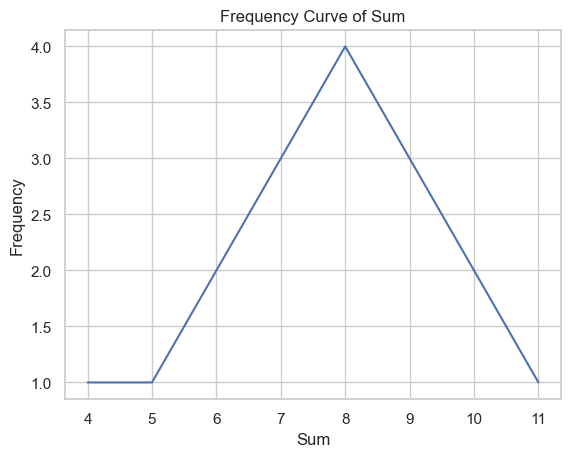

Mean = 7.9
Std Dev = 1.9209372712298547
Mean Absolute Deviation = 1.3599999999999999
Median = 8.0
Variance = 3.69
Fisher Kurtosis = -0.07098949038270774
Pearson Kurtosis = 2.9290105096172923
Fisher Kurtosis with K-Statistics = 0.8387864366448556
Pearson Kurtosis with K-Statistics = 3.8387864366448556
Skewness = -0.7042632514434707
Percentage of Data within 1 Standard Deviation = 70.0%
Shapiro-Wilk Test Z-Score = 0.8709434270858765
Shapiro-Wilk Test P-Value = 0.10252776741981506
Anderson-Darling Test Z-Score = 0.684
Anderson-Darling Test P-Value = 0.7372306501289003
Kurtosis : Mesokurtic
K-Kurtosis : Leptokurtic
Skewness : Negatively (Left) Skewed
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -1.9984014443252818e-16
Normalized Std Dev : 1.0


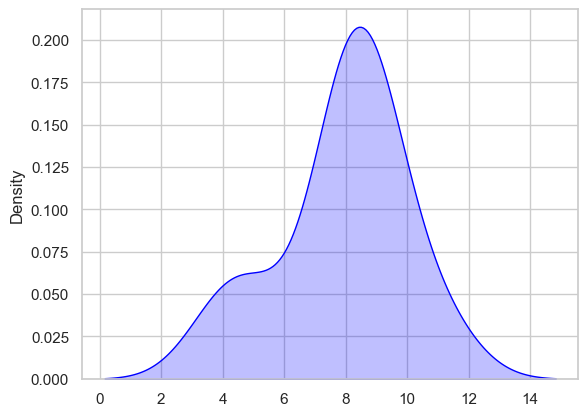

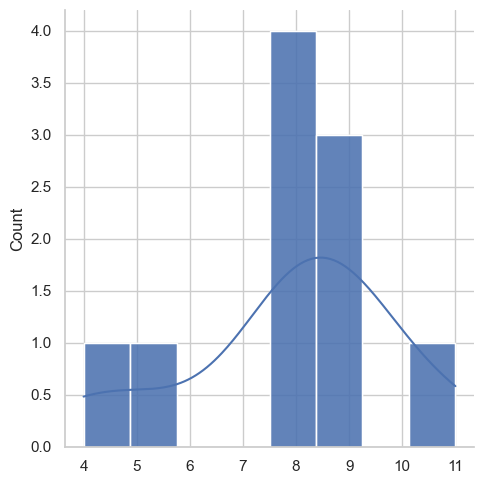

In [339]:
# Throw two dice 10 times and record the sum of the numbers obtained.
# Draw the frequency curve of sum vs frequency.
# Record the number of times you obtain the sum as greater than 5.

list = sum_roll_two_dice(probabilities=probabilities, times=times, num_dice=num_dice)

count_greater_than_5 = 0
for element in list:
    if element > 5:
        count_greater_than_5 = count_greater_than_5 + 1
        
print(f'Rolled Numbers : {list}')
print(f'Count of Sum Greater than 5 : {count_greater_than_5}')
plot_and_list(list=list, xlabel='Sum', ylabel='Frequency', title='Frequency Curve of Sum')

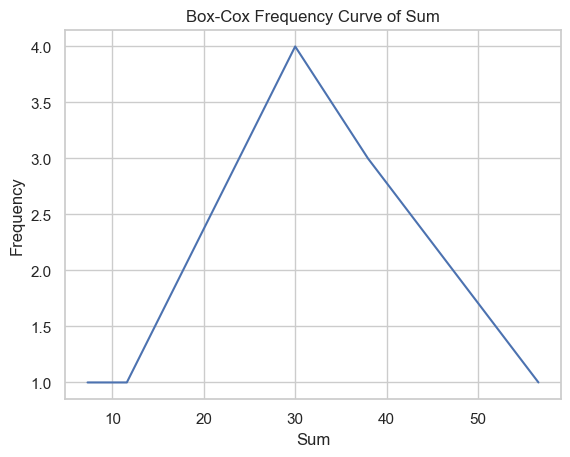

Mean = 30.94231948545786
Std Dev = 13.21403462192947
Mean Absolute Deviation = 9.354618944327191
Median = 30.004358514486547
Variance = 174.61071098955068
Fisher Kurtosis = -0.0598664340095687
Pearson Kurtosis = 2.9401335659904313
Fisher Kurtosis with K-Statistics = 0.8584504113045117
Pearson Kurtosis with K-Statistics = 3.8584504113045117
Skewness = -0.10923597889273827
Percentage of Data within 1 Standard Deviation = 70.0%
Shapiro-Wilk Test Z-Score = 0.9016155004501343
Shapiro-Wilk Test P-Value = 0.22820791602134705
Anderson-Darling Test Z-Score = 0.684
Anderson-Darling Test P-Value = 0.5904584226324072
Kurtosis : Mesokurtic
K-Kurtosis : Leptokurtic
Skewness : Zero Skew (Normal)
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -2.220446049250313e-16
Normalized Std Dev : 0.9999999999999999


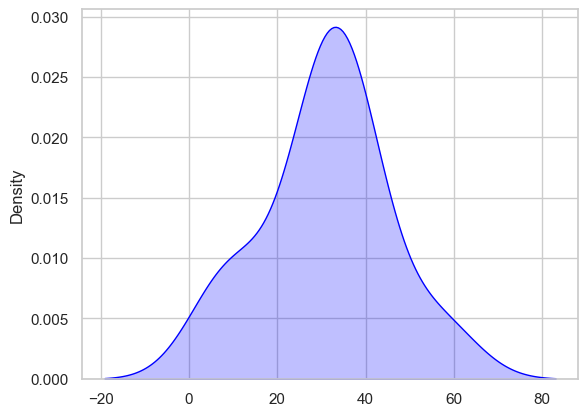

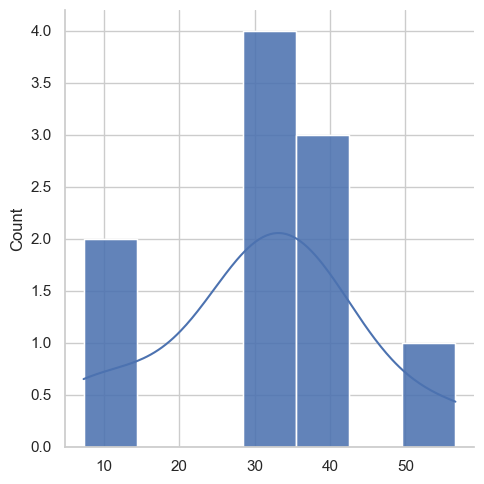

In [340]:
list_bc, _ = stats.boxcox(list)
plot_and_list(list=list_bc, xlabel='Sum', ylabel='Frequency', title='Box-Cox Frequency Curve of Sum')

In [341]:
trials = 10
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)
greater_than_5

[8, 7, 8, 6, 9, 5, 9, 8, 8, 7]

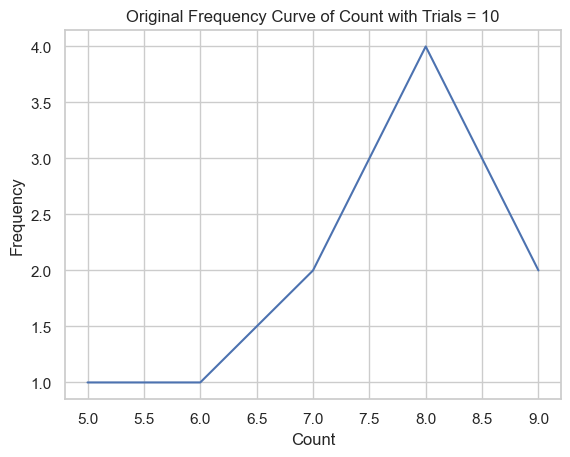

Mean = 7.5
Std Dev = 1.2041594578792296
Mean Absolute Deviation = 1.0
Median = 8.0
Variance = 1.45
Fisher Kurtosis = -0.40190249702734837
Pearson Kurtosis = 2.5980975029726516
Fisher Kurtosis with K-Statistics = 0.2537795141837944
Pearson Kurtosis with K-Statistics = 3.2537795141837944
Skewness = -0.6872729367206066
Percentage of Data within 1 Standard Deviation = 60.0%
Shapiro-Wilk Test Z-Score = 0.9032071232795715
Shapiro-Wilk Test P-Value = 0.23750852048397064
Anderson-Darling Test Z-Score = 0.684
Anderson-Darling Test P-Value = 0.47589410143931943
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Negatively (Left) Skewed
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value > Test Statistic). Not a Normal Distribution.
Normalized Mean : 0.0
Normalized Std Dev : 1.0


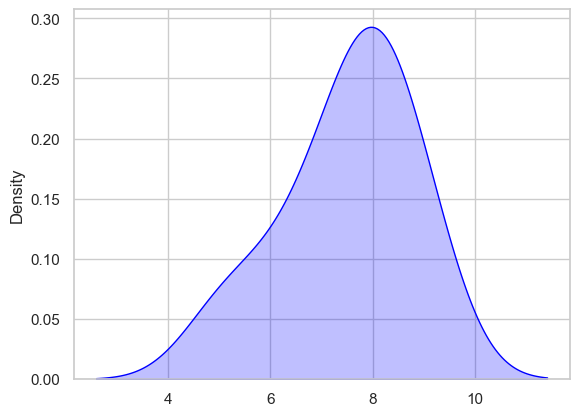

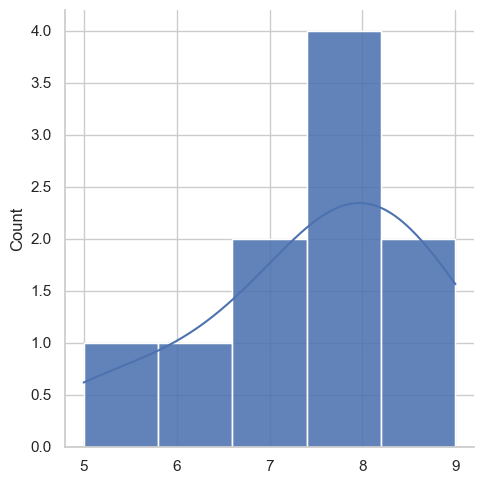

In [342]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")
# Negative Skewed, Leptokurtic. Binomial Distribution

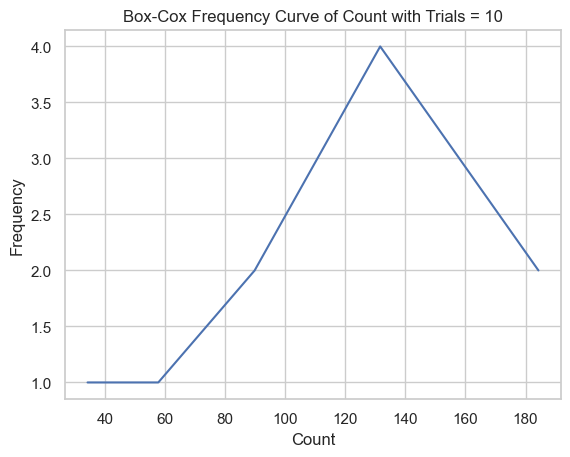

Mean = 116.66665666135407
Std Dev = 46.64705866385028
Mean Absolute Deviation = 39.01712193171619
Median = 131.6190353404505
Variance = 2175.94808198869
Fisher Kurtosis = -0.857860553236665
Pearson Kurtosis = 2.142139446763335
Fisher Kurtosis with K-Statistics = -0.5522891923291047
Pearson Kurtosis with K-Statistics = 2.4477108076708953
Skewness = -0.16950431519655929
Percentage of Data within 1 Standard Deviation = 60.0%
Shapiro-Wilk Test Z-Score = 0.924703061580658
Shapiro-Wilk Test P-Value = 0.39785414934158325
Anderson-Darling Test Z-Score = 0.684
Anderson-Darling Test P-Value = 0.3942486635284741
Kurtosis : Platykurtic
K-Kurtosis : Platykurtic
Skewness : Zero Skew (Normal)
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value > Test Statistic). Not a Normal Distribution.
Normalized Mean : -4.662936703425658e-16
Normalized Std Dev : 1.0000000000000002


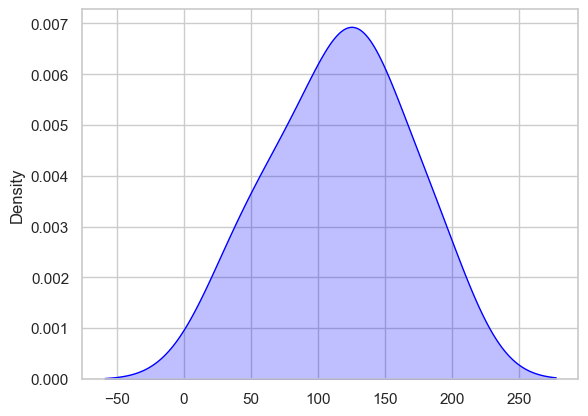

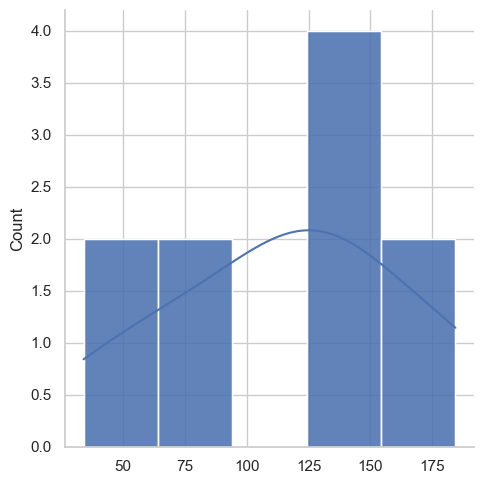

In [343]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

# Negative Skewed, Platykurtic, Almost Mesokurtic. Binomial Distribution

In [344]:
trials = 20
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

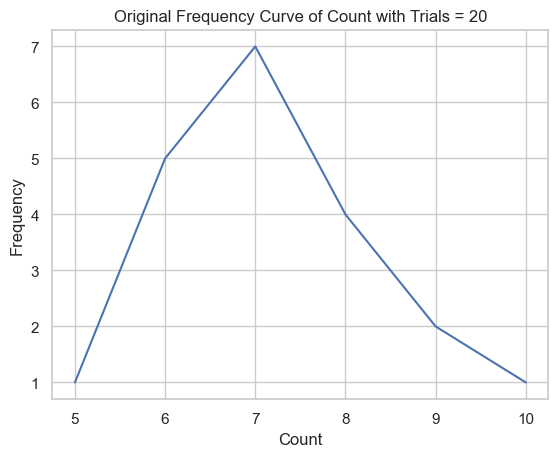

Mean = 7.2
Std Dev = 1.2083045973594573
Mean Absolute Deviation = 0.96
Median = 7.0
Variance = 1.46
Fisher Kurtosis = -0.2343779320698065
Pearson Kurtosis = 2.7656220679301935
Fisher Kurtosis with K-Statistics = 0.06693857877172338
Pearson Kurtosis with K-Statistics = 3.0669385787717234
Skewness = 0.4625523322599532
Percentage of Data within 1 Standard Deviation = 80.0%
Shapiro-Wilk Test Z-Score = 0.9337303638458252
Shapiro-Wilk Test P-Value = 0.18212246894836426
Anderson-Darling Test Z-Score = 0.692
Anderson-Darling Test P-Value = 0.6733508880594847
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -1.9984014443252818e-16
Normalized Std Dev : 0.9999999999999999


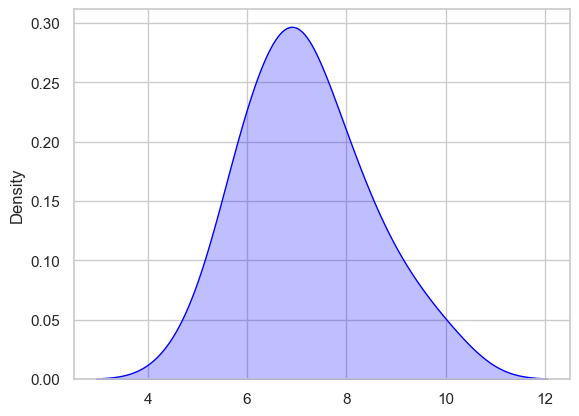

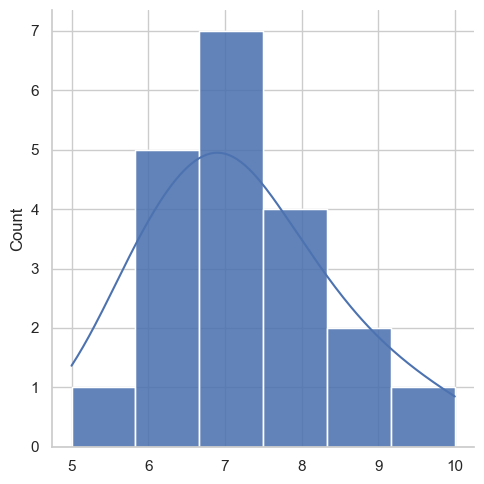

In [345]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

# Negative Skewed, Leptokurtic. Binomial Distribution

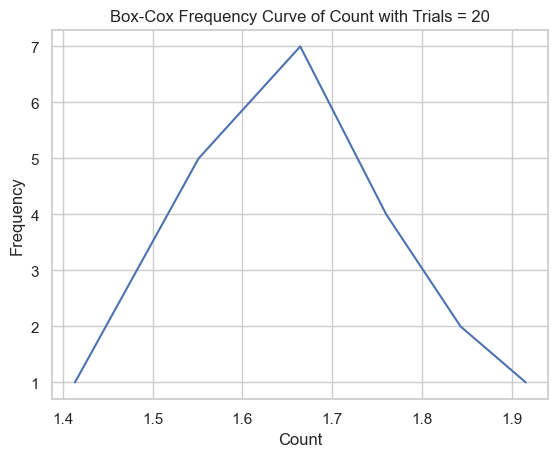

Mean = 1.6731406420313903
Std Dev = 0.12024942553514828
Mean Absolute Deviation = 0.09305495098301635
Median = 1.66442223027394
Variance = 0.014459924341533172
Fisher Kurtosis = -0.36748826253407696
Pearson Kurtosis = 2.632511737465923
Fisher Kurtosis with K-Statistics = -0.10662685212776735
Pearson Kurtosis with K-Statistics = 2.8933731478722327
Skewness = 0.0034100354474100127
Percentage of Data within 1 Standard Deviation = 55.00000000000001%
Shapiro-Wilk Test Z-Score = 0.9446397423744202
Shapiro-Wilk Test P-Value = 0.29294171929359436
Anderson-Darling Test Z-Score = 0.692
Anderson-Darling Test P-Value = 0.6083235562459883
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -1.2878587085651815e-15
Normalized Std Dev : 1.0


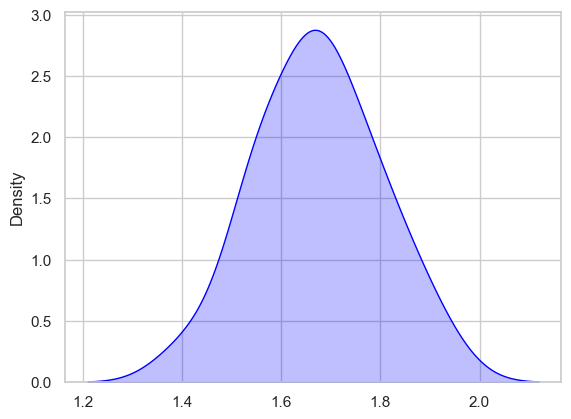

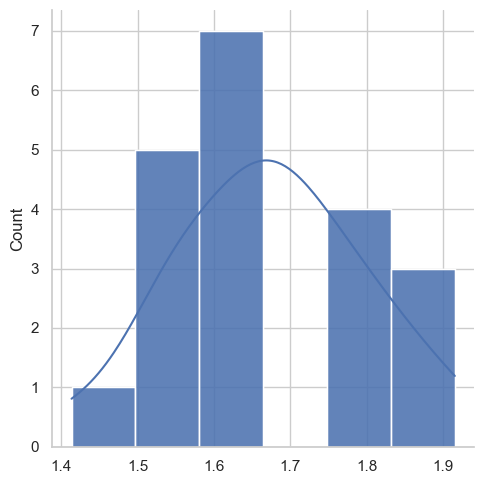

In [346]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [347]:
trials = 30
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

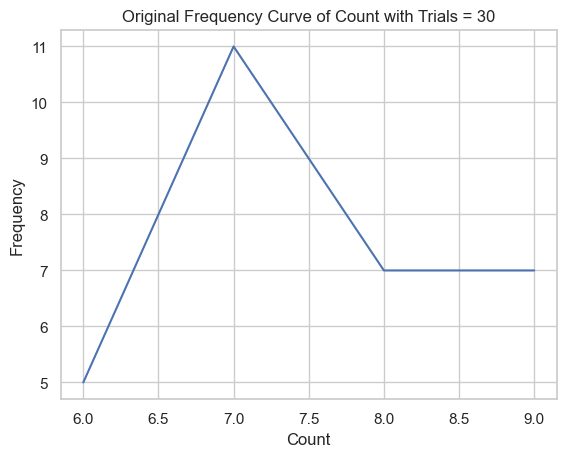

Mean = 7.533333333333333
Std Dev = 1.024152766382481
Mean Absolute Deviation = 0.9022222222222221
Median = 7.0
Variance = 1.0488888888888888
Fisher Kurtosis = -1.144175524274633
Pearson Kurtosis = 1.855824475725367
Fisher Kurtosis with K-Statistics = -1.1304415295276389
Pearson Kurtosis with K-Statistics = 1.8695584704723611
Skewness = 0.09626256341590608
Percentage of Data within 1 Standard Deviation = 60.0%
Kurtosis Test Z-Score = -2.0854778154867097
Kurtosis Test P-Value = 0.03702594984100721
Shapiro-Wilk Test Z-Score = 0.8701398968696594
Shapiro-Wilk Test P-Value = 0.0016872776905074716
Anderson-Darling Test Z-Score = 0.712
Anderson-Darling Test P-Value = 1.4700672748387902
Kurtosis : Platykurtic
K-Kurtosis : Platykurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 1.3322676295501878e-16

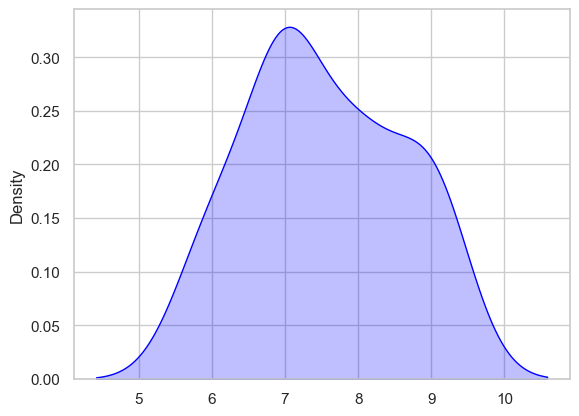

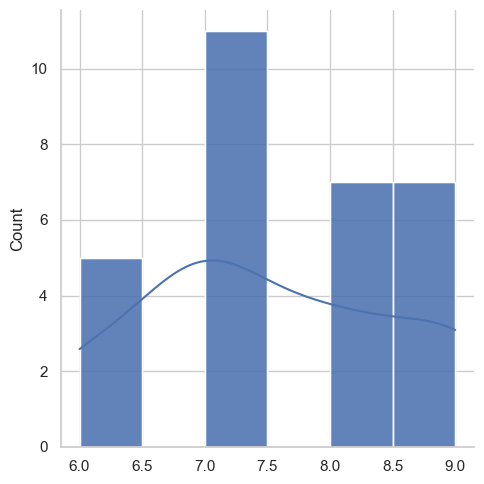

In [348]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

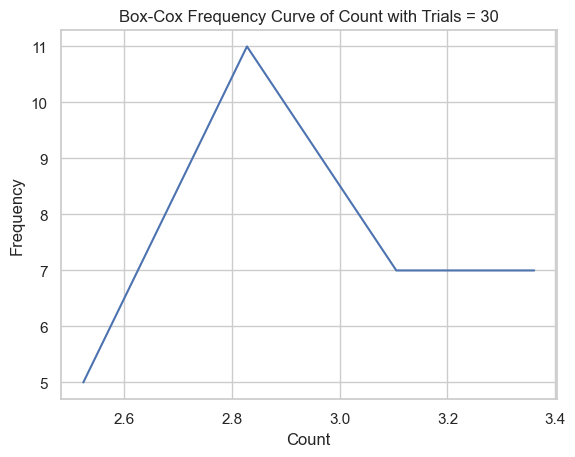

Mean = 2.9663432287897566
Std Dev = 0.2836771902864978
Mean Absolute Deviation = 0.24895740105484265
Median = 2.82787582028469
Variance = 0.08047274828884189
Fisher Kurtosis = -1.106782992409801
Pearson Kurtosis = 1.893217007590199
Fisher Kurtosis with K-Statistics = -1.0859760716619191
Pearson Kurtosis with K-Statistics = 1.9140239283380809
Skewness = -0.018255015064717366
Percentage of Data within 1 Standard Deviation = 60.0%
Kurtosis Test Z-Score = -1.9408953644827698
Kurtosis Test P-Value = 0.05227097039788758
Shapiro-Wilk Test Z-Score = 0.8724997043609619
Shapiro-Wilk Test P-Value = 0.0019050936680287123
Anderson-Darling Test Z-Score = 0.712
Anderson-Darling Test P-Value = 1.4281946336224678
Kurtosis : Platykurtic
K-Kurtosis : Platykurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 1.0

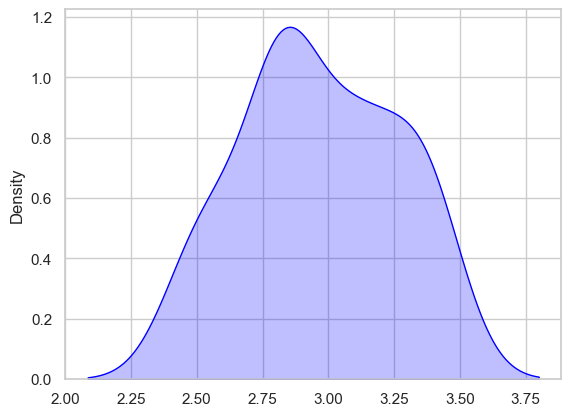

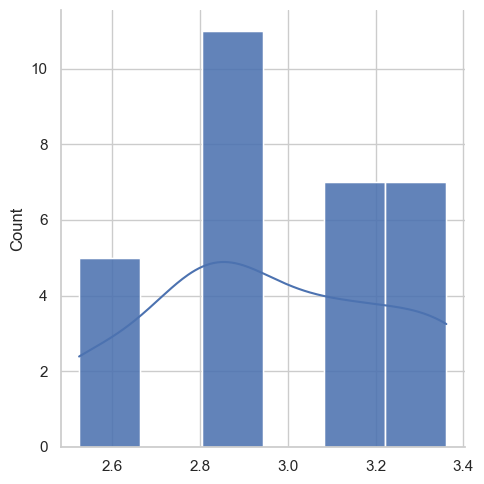

In [349]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

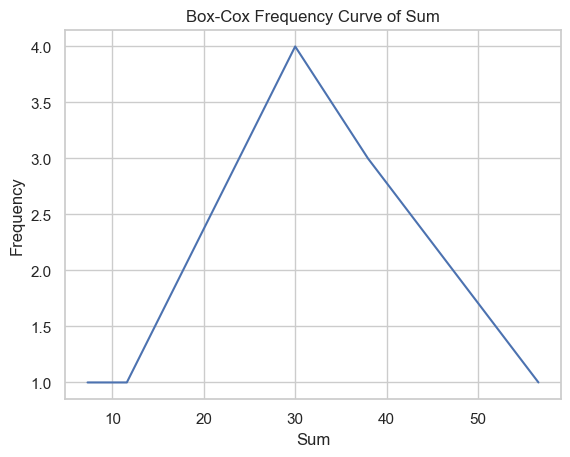

Mean = 30.94231948545786
Std Dev = 13.21403462192947
Mean Absolute Deviation = 9.354618944327191
Median = 30.004358514486547
Variance = 174.61071098955068
Fisher Kurtosis = -0.0598664340095687
Pearson Kurtosis = 2.9401335659904313
Fisher Kurtosis with K-Statistics = 0.8584504113045117
Pearson Kurtosis with K-Statistics = 3.8584504113045117
Skewness = -0.10923597889273827
Percentage of Data within 1 Standard Deviation = 70.0%
Shapiro-Wilk Test Z-Score = 0.9016155004501343
Shapiro-Wilk Test P-Value = 0.22820791602134705
Anderson-Darling Test Z-Score = 0.684
Anderson-Darling Test P-Value = 0.5904584226324072
Kurtosis : Mesokurtic
K-Kurtosis : Leptokurtic
Skewness : Zero Skew (Normal)
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -2.220446049250313e-16
Normalized Std Dev : 0.9999999999999999


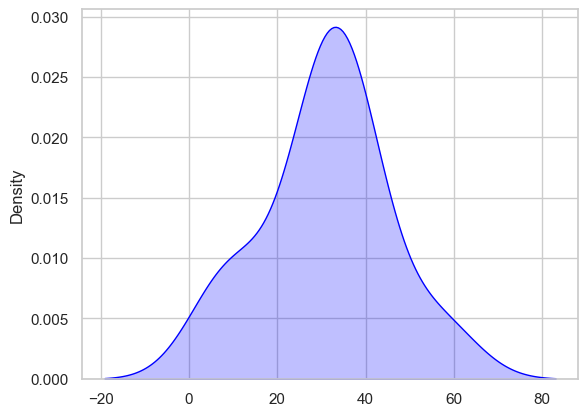

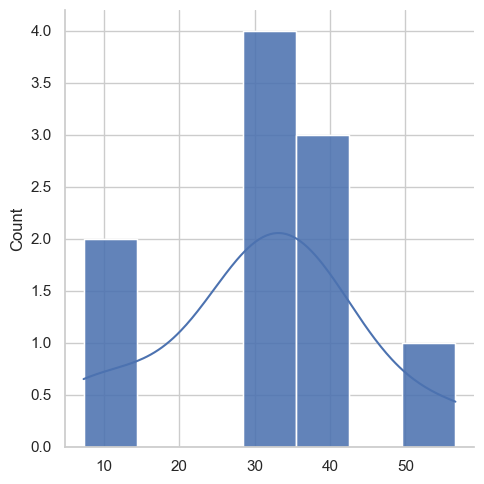

In [350]:
list_bc, _ = stats.boxcox(list)
plot_and_list(list=list_bc, xlabel='Sum', ylabel='Frequency', title='Box-Cox Frequency Curve of Sum')

In [351]:
trials = 40
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

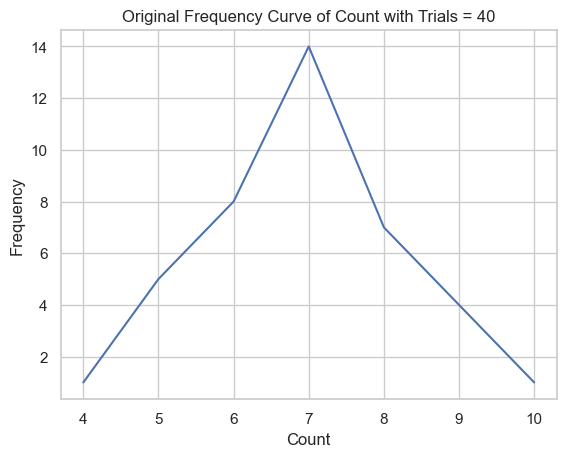

Mean = 6.925
Std Dev = 1.3112494041943357
Mean Absolute Deviation = 0.9975000000000002
Median = 7.0
Variance = 1.719375
Fisher Kurtosis = -0.2885842641934113
Pearson Kurtosis = 2.7114157358065887
Fisher Kurtosis with K-Statistics = -0.16176830614883686
Pearson Kurtosis with K-Statistics = 2.838231693851163
Skewness = 0.07198009784598301
Percentage of Data within 1 Standard Deviation = 72.5%
Kurtosis Test Z-Score = -0.026562485042882115
Kurtosis Test P-Value = 0.978808695293004
Shapiro-Wilk Test Z-Score = 0.9502332806587219
Shapiro-Wilk Test P-Value = 0.07724528759717941
Anderson-Darling Test Z-Score = 0.726
Anderson-Darling Test P-Value = 1.012821546649569
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 1.3322676295501878e-16
Normalized Std Dev : 1.

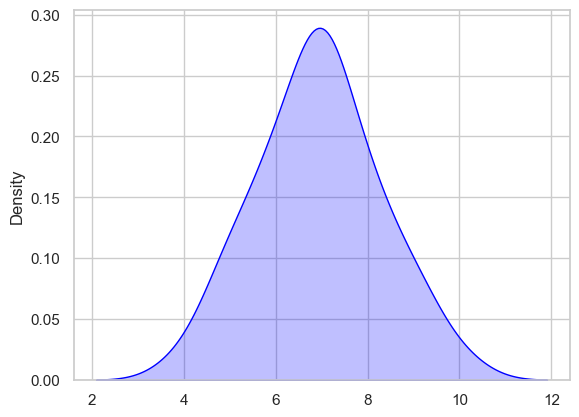

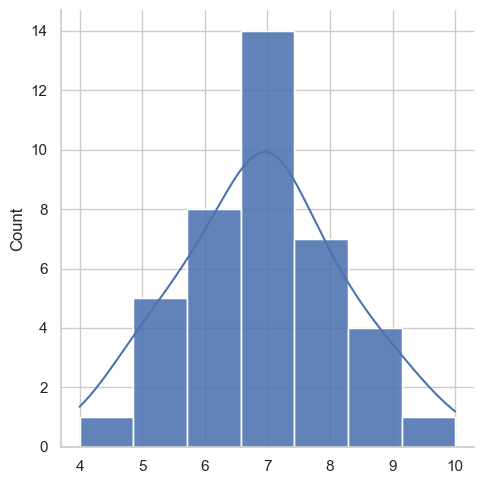

In [352]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

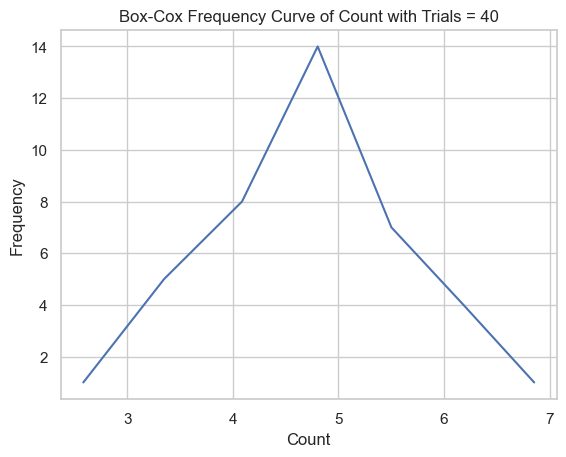

Mean = 4.735413065537213
Std Dev = 0.9309476493954086
Mean Absolute Deviation = 0.7128417848622364
Median = 4.804405729695396
Variance = 0.8666635259148366
Fisher Kurtosis = -0.28689547876346166
Pearson Kurtosis = 2.7131045212365383
Fisher Kurtosis with K-Statistics = -0.15984770308874463
Pearson Kurtosis with K-Statistics = 2.8401522969112554
Skewness = -0.01634308442303072
Percentage of Data within 1 Standard Deviation = 72.5%
Kurtosis Test Z-Score = -0.023394136342501943
Kurtosis Test P-Value = 0.9813358822483879
Shapiro-Wilk Test Z-Score = 0.9505385160446167
Shapiro-Wilk Test P-Value = 0.07913654297590256
Anderson-Darling Test Z-Score = 0.726
Anderson-Darling Test P-Value = 1.0122451516777033
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -3.13

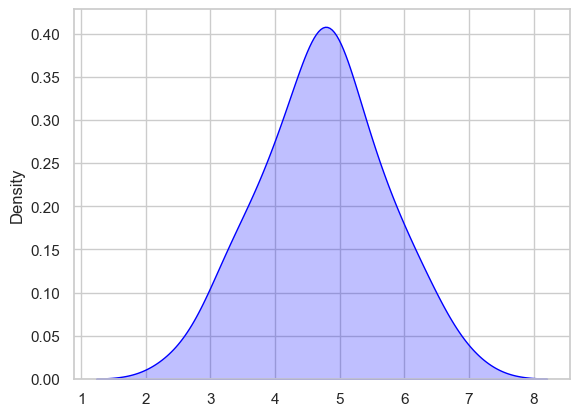

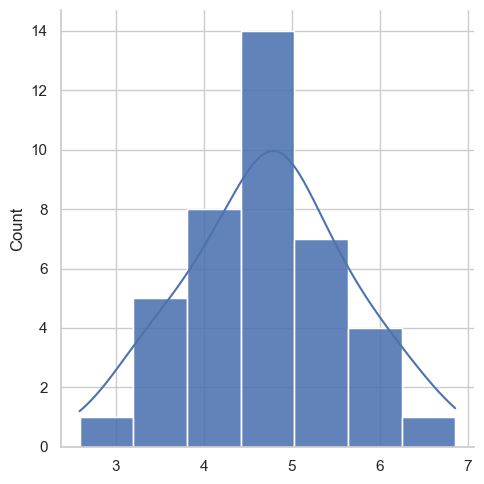

In [353]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [354]:
trials = 100
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

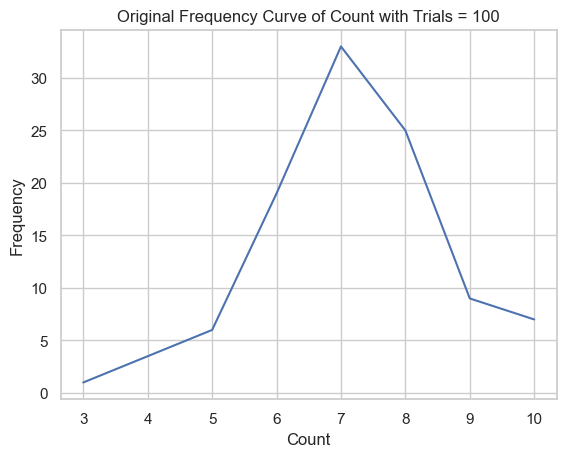

Mean = 7.29
Std Dev = 1.321325092473461
Mean Absolute Deviation = 1.0421999999999998
Median = 7.0
Variance = 1.7459
Fisher Kurtosis = 0.3378093143137395
Pearson Kurtosis = 3.3378093143137395
Fisher Kurtosis with K-Statistics = 0.4178156252706793
Pearson Kurtosis with K-Statistics = 3.4178156252706793
Skewness = 0.0028947920233859223
Percentage of Data within 1 Standard Deviation = 77.0%
Kurtosis Test Z-Score = 0.977270967550853
Kurtosis Test P-Value = 0.32843502218389187
Shapiro-Wilk Test Z-Score = 0.9379000663757324
Shapiro-Wilk Test P-Value = 0.00014388313866220415
Anderson-Darling Test Z-Score = 0.759
Anderson-Darling Test P-Value = 2.658291975561056
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value <= Z-Score). Not a Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -7.216449660063518e-18
Normalized Std Dev 

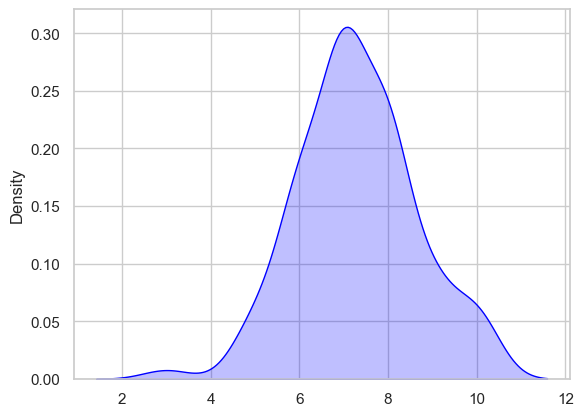

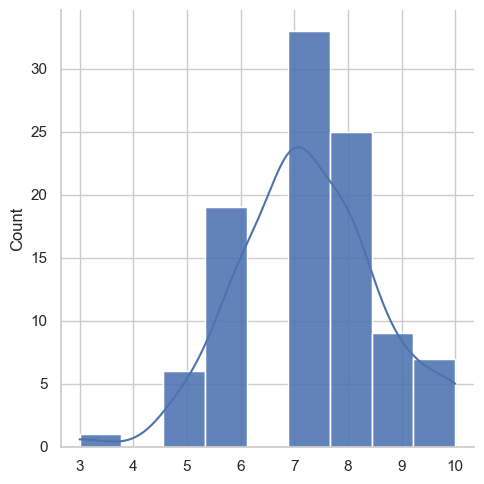

In [355]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

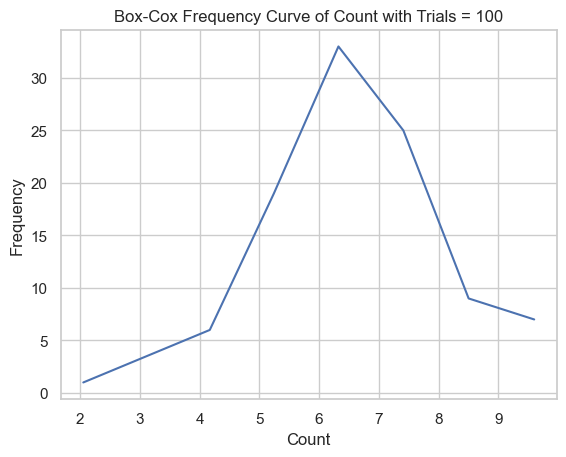

Mean = 6.644928298386374
Std Dev = 1.433285970392053
Mean Absolute Deviation = 1.1320110627786224
Median = 6.324890792604583
Variance = 2.0543086729226894
Fisher Kurtosis = 0.3013902850050707
Pearson Kurtosis = 3.3013902850050707
Fisher Kurtosis with K-Statistics = 0.3795078329229651
Pearson Kurtosis with K-Statistics = 3.379507832922965
Skewness = 0.03149987105784798
Percentage of Data within 1 Standard Deviation = 77.0%
Kurtosis Test Z-Score = 0.9140770216334511
Kurtosis Test P-Value = 0.36067637566706967
Shapiro-Wilk Test Z-Score = 0.9378979206085205
Shapiro-Wilk Test P-Value = 0.00014384066162165254
Anderson-Darling Test Z-Score = 0.759
Anderson-Darling Test P-Value = 2.672418083045926
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value <= Z-Score). Not a Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 1.137

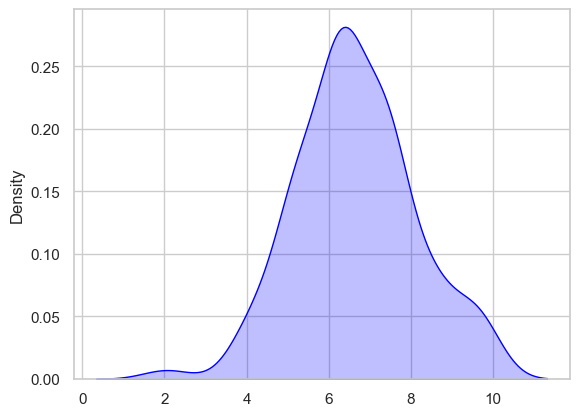

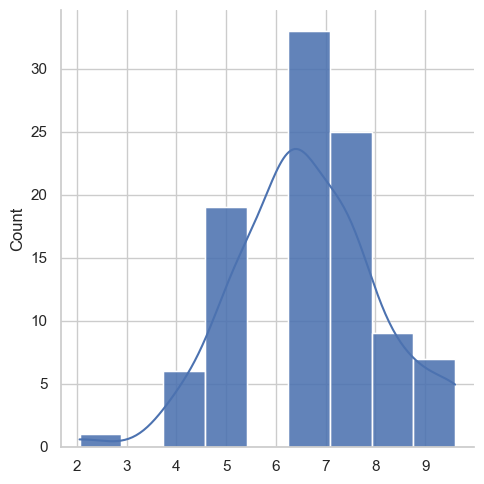

In [356]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5) 
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [357]:
trials = 200
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

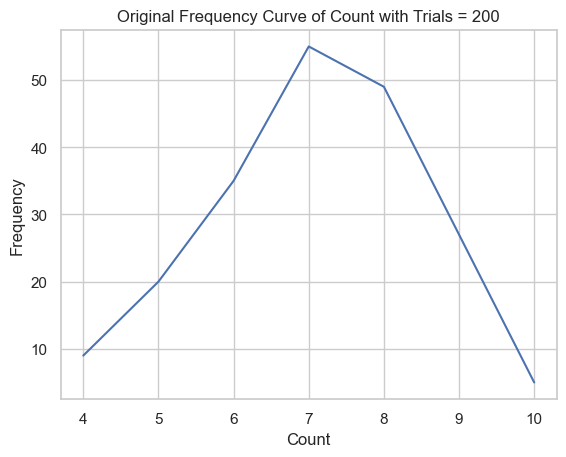

Mean = 7.08
Std Dev = 1.4084033513166603
Mean Absolute Deviation = 1.1152
Median = 7.0
Variance = 1.9835999999999998
Fisher Kurtosis = -0.46177042553536696
Pearson Kurtosis = 2.538229574464633
Fisher Kurtosis with K-Statistics = -0.44291532715451787
Pearson Kurtosis with K-Statistics = 2.557084672845482
Skewness = -0.23859894742129845
Percentage of Data within 1 Standard Deviation = 69.5%
Kurtosis Test Z-Score = -1.5360424343094687
Kurtosis Test P-Value = 0.1245279732771903
Shapiro-Wilk Test Z-Score = 0.9456738829612732
Shapiro-Wilk Test P-Value = 7.382133162536775e-07
Anderson-Darling Test Z-Score = 0.772
Anderson-Darling Test P-Value = 4.456522968259719
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -5.329070518200751e-17
Normalized Std Dev : 1.0

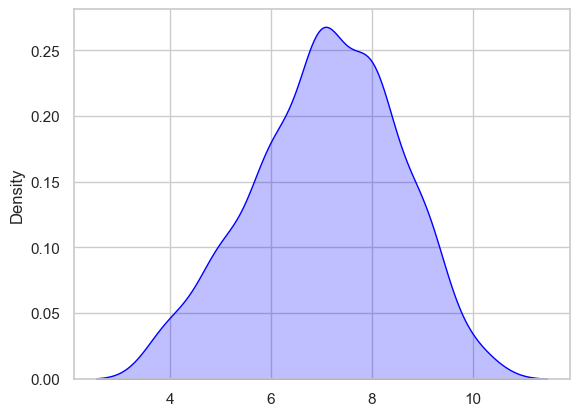

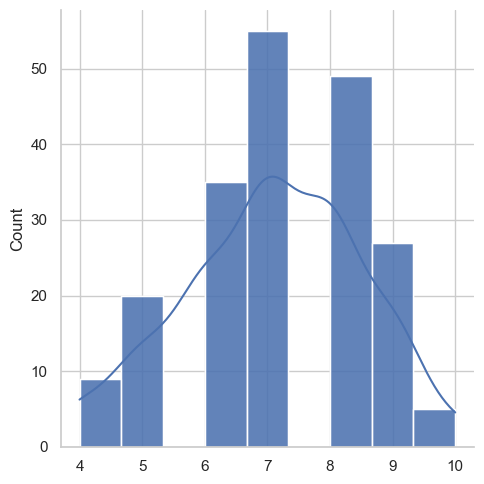

In [358]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

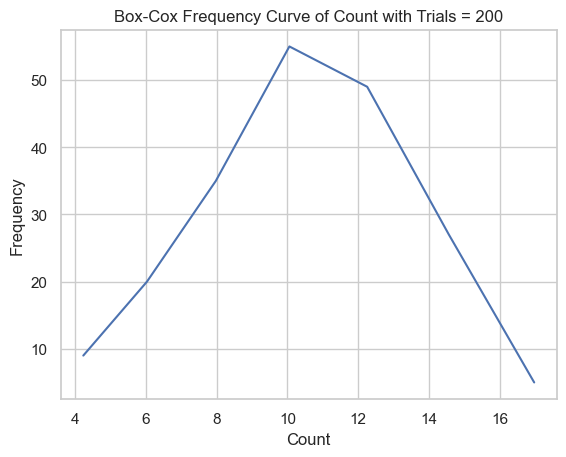

Mean = 10.347969497629064
Std Dev = 2.992323607427531
Mean Absolute Deviation = 2.405547063577302
Median = 10.05609765180218
Variance = 8.95400057156811
Fisher Kurtosis = -0.5317678007760529
Pearson Kurtosis = 2.468232199223947
Fisher Kurtosis with K-Statistics = -0.5146946691083762
Pearson Kurtosis with K-Statistics = 2.4853053308916238
Skewness = -0.05948985284280793
Percentage of Data within 1 Standard Deviation = 69.5%
Kurtosis Test Z-Score = -1.8996003194873319
Kurtosis Test P-Value = 0.057485590275981054
Shapiro-Wilk Test Z-Score = 0.9485484957695007
Shapiro-Wilk Test P-Value = 1.3706163599636056e-06
Anderson-Darling Test Z-Score = 0.772
Anderson-Darling Test P-Value = 4.297562436763144
Kurtosis : Platykurtic
K-Kurtosis : Platykurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 7.90478

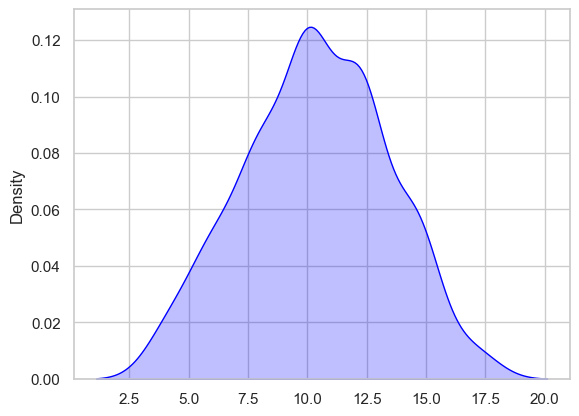

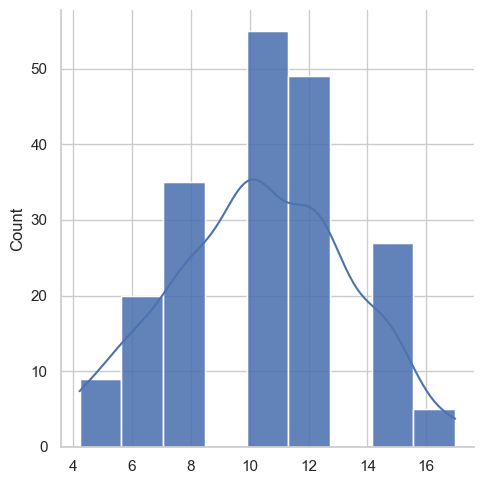

In [359]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [360]:
trials = 1000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

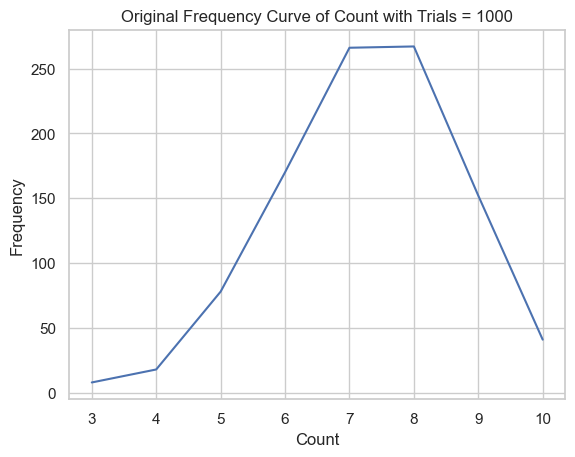

Mean = 7.282
Std Dev = 1.391573210434866
Mean Absolute Deviation = 1.12856
Median = 7.0
Variance = 1.9364759999999996
Fisher Kurtosis = -0.07013761304239541
Pearson Kurtosis = 2.9298623869576046
Fisher Kurtosis with K-Statistics = -0.06446548352952863
Pearson Kurtosis with K-Statistics = 2.9355345164704714
Skewness = -0.3201354724906174
Percentage of Data within 1 Standard Deviation = 70.3%
Kurtosis Test Z-Score = -0.3595345967804298
Kurtosis Test P-Value = 0.7191952011082987
Shapiro-Wilk Test Z-Score = 0.947749137878418
Shapiro-Wilk Test P-Value = 2.456663346760785e-18
Anderson-Darling Test Z-Score = 0.784
Anderson-Darling Test P-Value = 22.167664066218776
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 6.217248937900877e-18
Normalized Std Dev : 1.

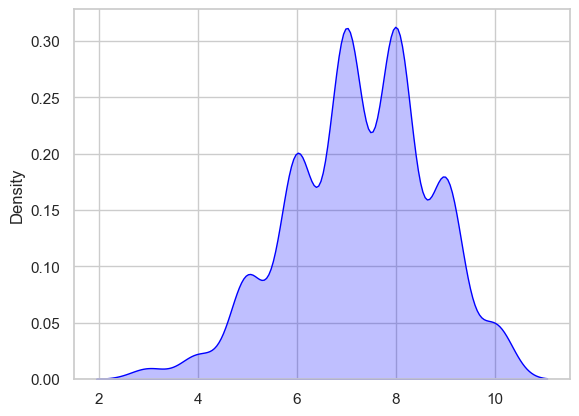

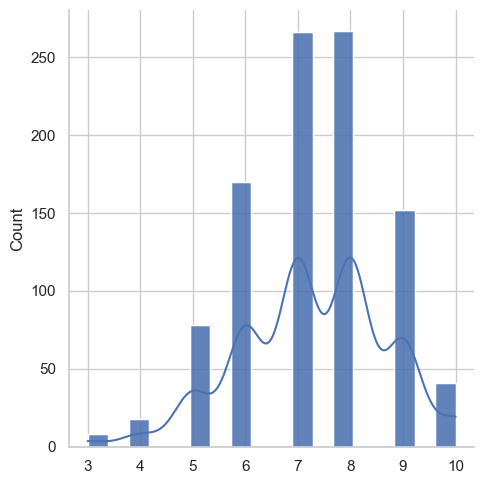

In [361]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

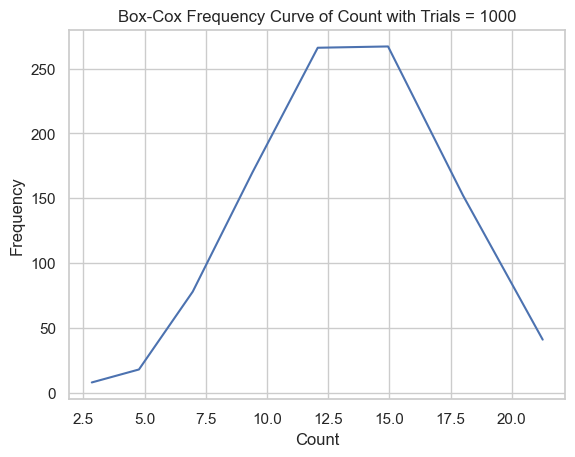

Mean = 13.06049831955635
Std Dev = 3.8629758725006424
Mean Absolute Deviation = 3.181458167568207
Median = 12.070861804979048
Variance = 14.922582591522099
Fisher Kurtosis = -0.35011866387661517
Pearson Kurtosis = 2.649881336123385
Fisher Kurtosis with K-Statistics = -0.3458514961296224
Pearson Kurtosis with K-Statistics = 2.6541485038703776
Skewness = -0.03836008180873226
Percentage of Data within 1 Standard Deviation = 70.3%
Kurtosis Test Z-Score = -2.658024674165474
Kurtosis Test P-Value = 0.007860013822887379
Shapiro-Wilk Test Z-Score = 0.9516274929046631
Shapiro-Wilk Test P-Value = 1.2876864525039566e-17
Anderson-Darling Test Z-Score = 0.784
Anderson-Darling Test P-Value = 21.76369802506929
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Shapiro-Wilk Test (P-Value <= Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : 7.2830

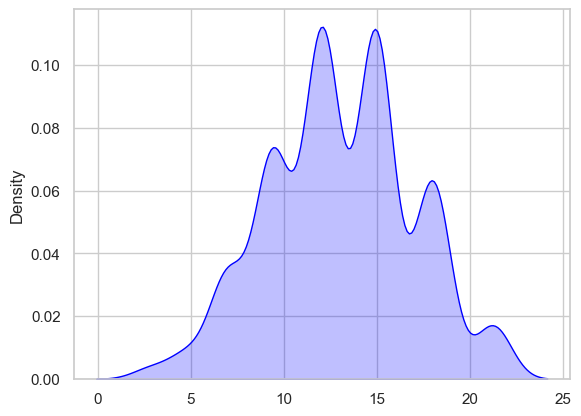

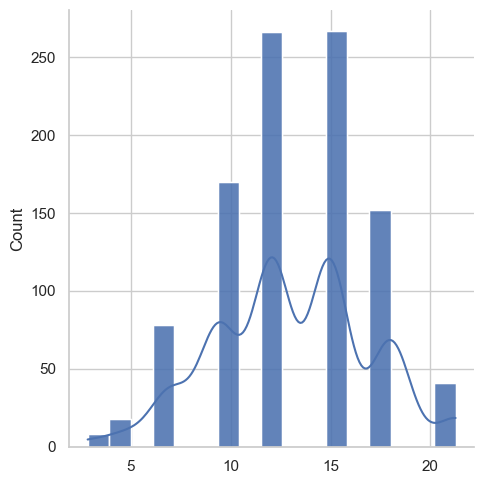

In [362]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [363]:
trials = 100000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

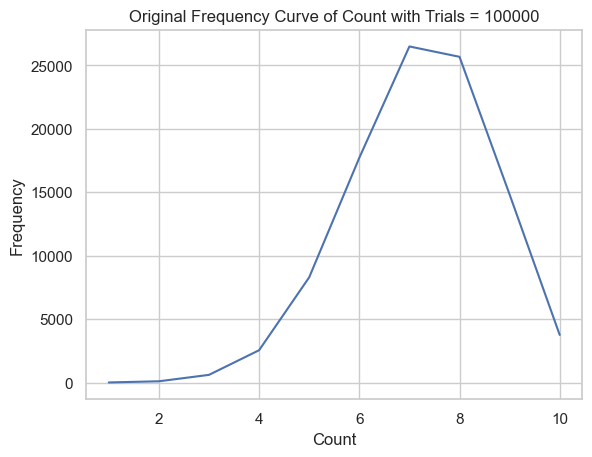

Mean = 7.21712
Std Dev = 1.4144747808285592
Mean Absolute Deviation = 1.1393887999999999
Median = 7.0
Variance = 2.0007389056000005
Fisher Kurtosis = -0.08581683871592638
Pearson Kurtosis = 2.9141831612840736
Fisher Kurtosis with K-Statistics = -0.08576112731225338
Pearson Kurtosis with K-Statistics = 2.9142388726877466
Skewness = -0.3193562729943775
Percentage of Data within 1 Standard Deviation = 69.881%
Kurtosis Test Z-Score = -5.778642006943253
Kurtosis Test P-Value = 7.530596786811113e-09
Anderson-Darling Test Z-Score = 0.787
Anderson-Darling Test P-Value = 2151.2019453300454
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -2.899014361901209e-16
Normalized Std Dev : 0.9999999999999998


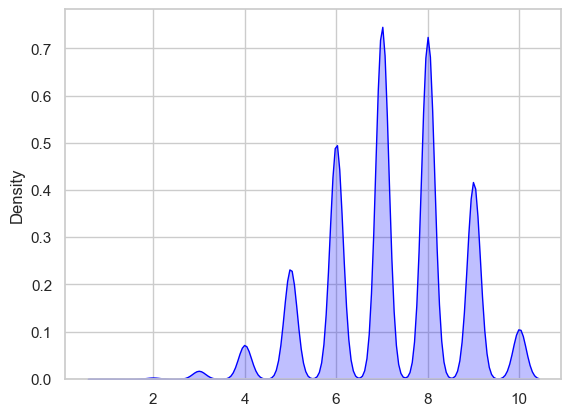

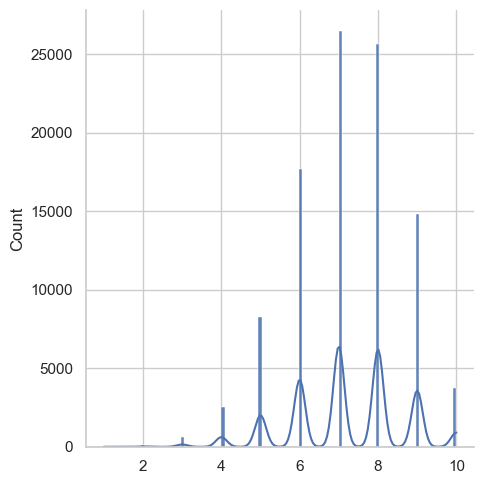

In [364]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

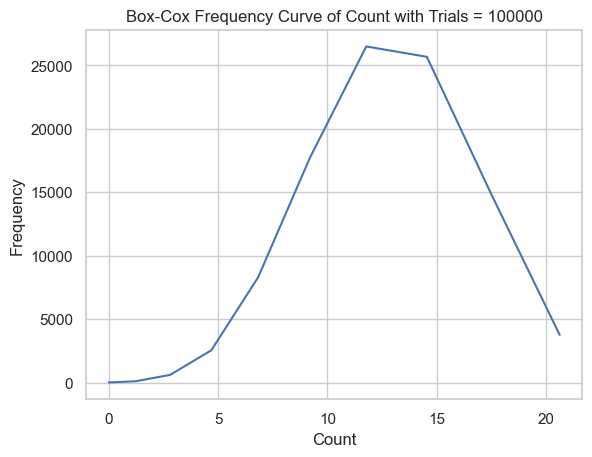

Mean = 12.561454765740443
Std Dev = 3.7752663261881403
Mean Absolute Deviation = 3.094981108742008
Median = 11.781176123564531
Variance = 14.252635833650098
Fisher Kurtosis = -0.3746261463968743
Pearson Kurtosis = 2.6253738536031257
Fisher Kurtosis with K-Statistics = -0.37458487597846
Pearson Kurtosis with K-Statistics = 2.62541512402154
Skewness = -0.041602709165167825
Percentage of Data within 1 Standard Deviation = 69.881%
Kurtosis Test Z-Score = -29.9982678029477
Kurtosis Test P-Value = 1.0337454535335595e-197
Anderson-Darling Test Z-Score = 0.787
Anderson-Darling Test P-Value = 2110.9462298459694
Kurtosis : Mesokurtic
K-Kurtosis : Mesokurtic
Skewness : Zero Skew (Normal)
Kurtosis Test (P-Value > Z-Score). Normal Distribution.
Anderson-Darling Test (Critical Value < Test Statistic). Normal Distribution.
Normalized Mean : -3.077182952893054e-16
Normalized Std Dev : 1.0


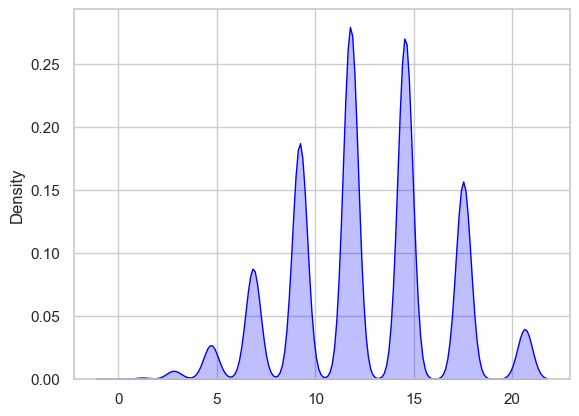

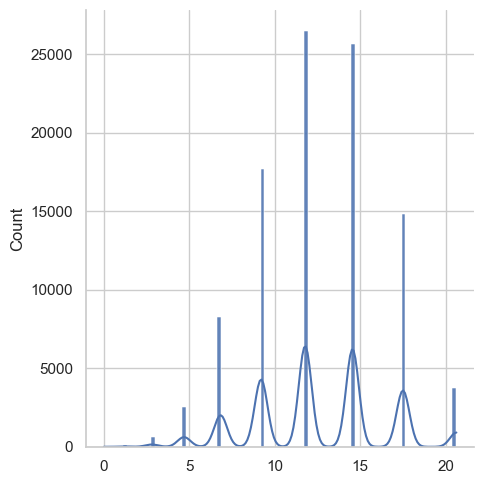

In [365]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")